In [14]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

import numpy as np

from art.metrics import PDTP, SHAPr
from art.utils import load_nursery

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from art.estimators.classification.scikitlearn import ScikitlearnRandomForestClassifier, ScikitlearnDecisionTreeClassifier

(x_train, y_train), (x_test, y_test), _, _ = load_nursery(test_set=0.5)

model = RandomForestClassifier()
model.fit(x_train, y_train)
extra_model = RandomForestClassifier()

art_classifier = ScikitlearnRandomForestClassifier(model)
extra_classifier = ScikitlearnRandomForestClassifier(extra_model)

num_samples = 100

In [15]:
indexes = np.array(range(num_samples))
leakage = PDTP(art_classifier, extra_classifier, x_train, y_train, indexes=indexes)

print("Average PDTP leakage random forest: ", np.average(leakage))
print("Max PDTP leakage random forest: ", np.max(leakage))

Average PDTP leakage random forest:  1.253083866954058
Max PDTP leakage random forest:  1.5488378571018933


In [16]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
extra_model2 = DecisionTreeClassifier()

art_classifier2 = ScikitlearnDecisionTreeClassifier(model2)
extra_classifier2 = ScikitlearnDecisionTreeClassifier(extra_model2)

In [17]:
leakage2 = PDTP(art_classifier2, extra_classifier2, x_train, y_train, indexes=indexes, num_iter=1)
print("Average PDTP leakage decision tree: ", np.average(leakage2))
print("Max PDTP leakage decision tree: ", np.max(leakage2))

Average PDTP leakage decision tree:  1.0
Max PDTP leakage decision tree:  1.0


In [18]:
SHAPr_leakage = SHAPr(art_classifier, x_train, y_train, x_test, y_test)
print("Average SHAPr leakage random forest: ", np.average(SHAPr_leakage))
print("Max SHAPr leakage random forest: ", np.max(SHAPr_leakage))

SHAPr_leakage2 = SHAPr(art_classifier2, x_train, y_train, x_test, y_test)

print("Average PDTP leakage decision tree: ", np.average(SHAPr_leakage2))
print("Max PDTP leakage decision tree: ", np.max(SHAPr_leakage2))

Average SHAPr leakage random forest:  0.9742204384069146
Max SHAPr leakage random forest:  1.3662636141580258
Average PDTP leakage decision tree:  0.981167026860142
Max PDTP leakage decision tree:  1.0039066397894296


In [33]:
top = 10

SHAPr_leakage2_short = SHAPr_leakage2[:num_samples]
SHAPr_leakage_short = SHAPr_leakage[:num_samples]

highest_SHAPr_dt = np.argmax(SHAPr_leakage2_short)
highest_PDTP_dt = np.argmax(leakage2)
print('decision tree: max leakage ', highest_SHAPr_dt, highest_PDTP_dt)
top_SHAPr_dt = np.argpartition(SHAPr_leakage2_short, -top)[-top:]
top_PDTP_dt = np.argpartition(leakage2, -top)[-top:]
print('decision tree: top 10 leakage ', np.sort(top_SHAPr_dt), np.sort(top_PDTP_dt))

highest_SHAPr_rf = np.argmax(SHAPr_leakage_short)
highest_PDTP_rf = np.argmax(leakage)
print('random forest: max leakage ', highest_SHAPr_rf, highest_PDTP_rf)
top_SHAPr_rf = np.argpartition(SHAPr_leakage_short, -top)[-top:]
top_PDTP_rf = np.argpartition(leakage, -top)[-top:]
print('random forest: top 10 leakage ', np.sort(top_SHAPr_rf), np.sort(top_PDTP_rf))

print('decision tree, indexes with highest score:')
highest_val_SHAPr_dt2 = np.max(SHAPr_leakage2_short)
highest_indexes_shap2 = np.argwhere(SHAPr_leakage2_short == highest_val_SHAPr_dt2)
print('shap:')
print(highest_indexes_shap2)
highest_val_PDTP_dt2 = np.max(leakage2)
highest_indexes2 = np.argwhere(leakage2 == highest_val_PDTP_dt2)
print('pdtp:')
print(highest_indexes2)

print('random forest, indexes with highest score:')
highest_val_SHAPr_dt = np.max(SHAPr_leakage_short)
highest_indexes_shap = np.argwhere(SHAPr_leakage_short == highest_val_SHAPr_dt)
print('shap:')
print(highest_indexes_shap)
highest_val_PDTP_dt = np.max(leakage)
highest_indexes = np.argwhere(leakage == highest_val_PDTP_dt)
print('pdtp:')
print(highest_indexes)

decision tree: max leakage  18 0
decision tree: top 10 leakage  [ 3 18 28 35 42 45 52 57 58 75] [26 27 29 30 31 32 33 34 35 99]
random forest: max leakage  38 32
random forest: top 10 leakage  [ 8 10 19 27 38 47 52 58 75 76] [17 21 22 32 38 48 66 72 81 92]
decision tree, indexes with highest score:
shap:
[[18]
 [35]
 [52]]
pdtp:
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]]
roandom forest, indexes with highest score:
shap:
[[38]]
pdtp:
[[32]

<ipython-input-27-c3460e3f12be>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), SHAPr_leakage_short[:20], label="shap")


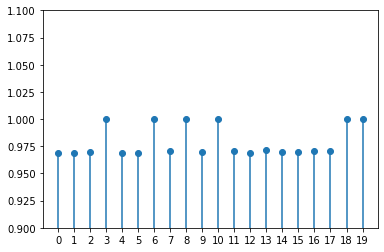

In [27]:
import matplotlib.pyplot as plt

plt.stem(range(20), SHAPr_leakage_short[:20], label="shap")
plt.xticks(range(20))
plt.ylim(0.9, 1.1)
plt.show()

<ipython-input-28-3de39bf3e8ed>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), leakage[:20], label="pdtp")


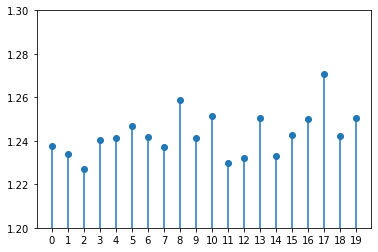

In [28]:
plt.stem(range(20), leakage[:20], label="pdtp")
plt.xticks(range(20))
plt.ylim(1.2, 1.3)
plt.show()

<ipython-input-30-15e4b289e6be>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), SHAPr_leakage2_short[:20], label="shap")


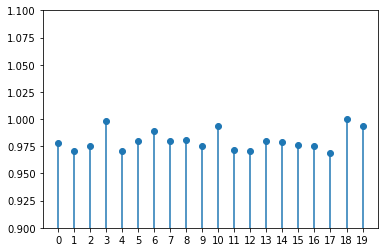

In [30]:
plt.stem(range(20), SHAPr_leakage2_short[:20], label="shap")
plt.xticks(range(20))
plt.ylim(0.9, 1.1)
plt.show()

<ipython-input-31-b1cd98eb8c3c>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), leakage2[:20], label="pdtp")


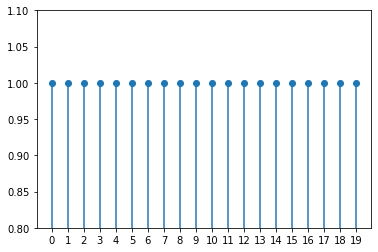

In [31]:
plt.stem(range(20), leakage2[:20], label="pdtp")
plt.xticks(range(20))
plt.ylim(0.8, 1.1)
plt.show()

In [34]:
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox

attack_train_ratio = 0.5
attack_train_size = int(len(x_train) * attack_train_ratio)
attack_test_size = int(len(x_test) * attack_train_ratio)

# random forest
bb_attack = MembershipInferenceBlackBox(art_classifier)

# train attack model
bb_attack.fit(x_train[attack_train_size:], y_train[attack_train_size:],
              x_test[attack_test_size:], y_test[attack_test_size:])

# get inferred values
inferred_train_bb = bb_attack.infer(x_train[:attack_train_size], y_train[:attack_train_size])
inferred_test_bb = bb_attack.infer(x_test[:attack_test_size], y_test[:attack_test_size])
# check accuracy
train_acc = np.sum(inferred_train_bb) / len(inferred_train_bb)
test_acc = 1 - (np.sum(inferred_test_bb) / len(inferred_test_bb))
acc = (train_acc * len(inferred_train_bb) + test_acc * len(inferred_test_bb)) / (len(inferred_train_bb) + len(inferred_test_bb))
print(train_acc)
print(test_acc)
print(acc)

0.7242976227230626
0.6035813522692188
0.6639394874961407


<ipython-input-35-cae04235fd2d>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), inferred_train_bb[:20], label="mem")


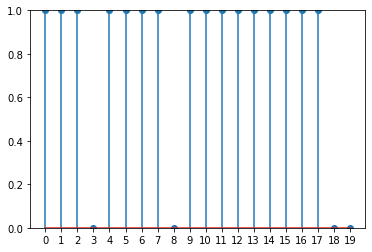

In [35]:
plt.stem(range(20), inferred_train_bb[:20], label="mem")
plt.xticks(range(20))
plt.ylim(0, 1)
plt.show()

In [36]:
# decision tree
bb_attack2 = MembershipInferenceBlackBox(art_classifier2)

# train attack model
bb_attack2.fit(x_train[attack_train_size:], y_train[attack_train_size:],
              x_test[attack_test_size:], y_test[attack_test_size:])

# get inferred values
inferred_train_bb2 = bb_attack2.infer(x_train[:attack_train_size], y_train[:attack_train_size])
inferred_test_bb2 = bb_attack2.infer(x_test[:attack_test_size], y_test[:attack_test_size])

# check accuracy
train_acc2 = np.sum(inferred_train_bb2) / len(inferred_train_bb2)
test_acc2 = 1 - (np.sum(inferred_test_bb2) / len(inferred_test_bb2))
acc2 = (train_acc2 * len(inferred_train_bb2) + test_acc2 * len(inferred_test_bb2)) / (len(inferred_train_bb2) + len(inferred_test_bb2))
print(train_acc2)
print(test_acc2)
print(acc2)

0.6384686631676443
0.35473911701142324
0.4966038900895338


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_true = np.ones(inferred_train_bb2.shape), y_pred = inferred_train_bb2))
print(classification_report(y_true = np.zeros(inferred_train_bb2.shape), y_pred = inferred_test_bb2))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.64      0.78      3239

    accuracy                           0.64      3239
   macro avg       0.50      0.32      0.39      3239
weighted avg       1.00      0.64      0.78      3239

              precision    recall  f1-score   support

         0.0       1.00      0.35      0.52      3239
         1.0       0.00      0.00      0.00         0

    accuracy                           0.35      3239
   macro avg       0.50      0.18      0.26      3239
weighted avg       1.00      0.35      0.52      3239



In [40]:
inferred_train_bb2_prob = bb_attack2.infer(x_train[:attack_train_size], y_train[:attack_train_size], probabilities=True)

<ipython-input-38-cc71f72e89a9>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(range(20), inferred_train_bb2[:20], label="mem")


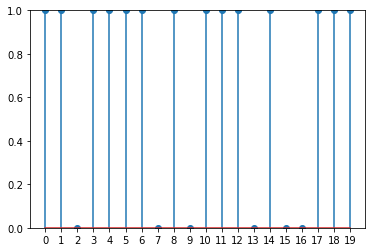

In [38]:
plt.stem(range(20), inferred_train_bb2[:20], label="mem")
plt.xticks(range(20))
plt.ylim(0, 1)
plt.show()

In [39]:
import scipy

print(scipy.stats.pearsonr(SHAPr_leakage2_short, leakage2))
print(scipy.stats.pearsonr(SHAPr_leakage_short, leakage))

(nan, nan)
(-0.17101179901538482, 0.08891040649889734)


/Users/abigailt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
